In [42]:
from logicqubit.logic import *

In [43]:
print('x1 x2 x3 x4 - r1 r2 r3')
[str(bin(i)[2:].zfill(4))+"-"+str(bin(int((i>>2)&0x3) + int(i&0x3))[2:].zfill(3)) for i in range(16)]

x1 x2 x3 x4 - r1 r2 r3


['0000-000',
 '0001-001',
 '0010-010',
 '0011-011',
 '0100-001',
 '0101-010',
 '0110-011',
 '0111-100',
 '1000-010',
 '1001-011',
 '1010-100',
 '1011-101',
 '1100-011',
 '1101-100',
 '1110-101',
 '1111-110']

In [44]:
poly = Zhegalkin_Poly()
poly.addTable(['0001','0011','0100','0110','1001','1011','1100','1110'])  # r3
poly.addTable(['0010','0011','0101','0110','1000','1001','1100','1111'])  # r2
poly.addTable(['0111','1010','1011','1101','1110','1111'])                # r1
poly.Compute()
poly.ShowPolynomial()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
logicQuBit  = LogicQuBit(8, first_left=False)

a1 = Qubit() # x1
a2 = Qubit() # x2
b1 = Qubit() # x3
b2 = Qubit() # x4
r1 = Qubit()
r2 = Qubit()
r3 = Qubit()
a = Qubit() # ancilla qubit

# 0,1,2,3 + 2
# a1a2
a1.H()
a2.H()

# b1b2
b1.X()
#b2.X()

# r3
r3.CX(a2)
r3.CX(b2)

# r2
r2.CX(a1)
r2.CCX(a2,b2)
r2.CX(b1)

# r3
a.CCX(b2,a2)
r1.CCX(a,a1)
a.CCX(b2,a2)

r1.CCX(a1,b1)

a.CCX(b2,b1)
r1.CCX(a,a2)
a.CCX(b2,b1)

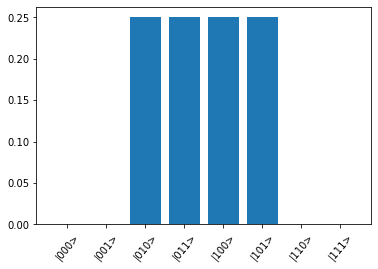

In [46]:
logicQuBit.Measure([r3,r2,r1])
logicQuBit.Plot()